<h1><center> K Nearest Neighbour Classifier</center></h1>


## What is  KNN ?
<b>K nearest neighbors</b> is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).This algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.

Two properties of KNN Algorithm:
* <b> Non-parametric</b>: This means that the algorithm  doesn’t assume anything about the underlying data.
* <b> Lazy Learning</b>: The algorithm does not have a specialized training phase and uses all the data for training while classification.

### Working of KNN Algorithm
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

The following steps are involved in the implementation of KNN algorithm:
* Step 1: We need to choose the value of K i.e. the nearest data points. K can be any integer.
* Step 2: Calculate the distance between test data and each row of training data with the help of any of the method namely: <b>Euclidean, Manhattan or Hamming distance</b>. The most commonly used method to calculate distance is Euclidean. We will discuss the three methods in the following slides

* Step 3: Now, based on the distance value, sort them in ascending order.
* Step 4: Next, it will choose the top K rows from the sorted array.
* Step 5: Now, it will assign a class to the test point based on most frequent class of these rows.

# Distance Functions in KNN
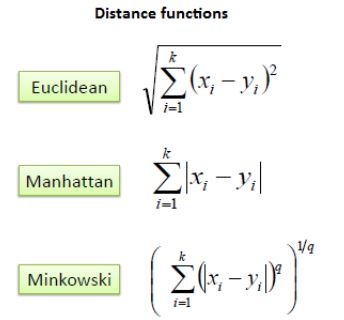

All three distance measures are only valid for continuous variables. In the instance of <b>categorical</b> variables the <b>Hamming distance</b> must be used. It also brings up the issue of standardization of the numerical variables between 0 and 1 when there is a mixture of numerical and categorical variables in the dataset.


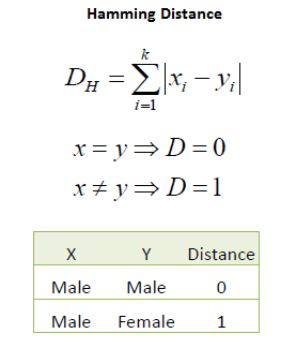

# How to choose K values?
* Choosing the optimal value for K is best done by first inspecting the data. 
* In general, a large K value is more precise as it reduces the overall noise but there is no guarantee. 
* Cross-validation is another way to retrospectively determine a good K value by using an independent dataset to validate the K value. 
* Historically, the optimal K for most datasets has been between 3-10. That produces much better results than 1NN.

# Why do we need Standardized Distance?
One major drawback in calculating distance measures directly from the training set is in the case where variables have different measurement scales or there is a mixture of numerical and categorical variables. 

For example, if one variable is based on annual income in dollars, and the other is based on age in years then income will have a much higher influence on the distance calculated. One solution is to standardize the training set as shown below.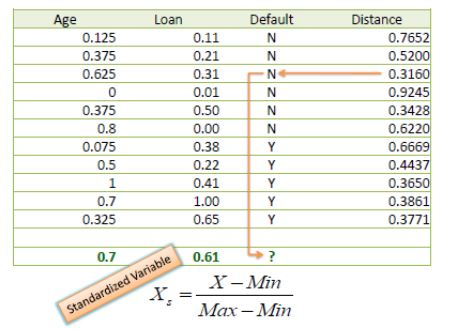

# Implementation of KNN Classifier using Python
Importing the neccessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
# Importing the dataset and slicing  it into independent and dependent variables
df = pd.read_csv("D:/Thesis/Others/Social_Network_Ads.csv")
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

Since our dataset containing character variables we have to encode it using LabelEncoder
 

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Next, we are doing feature scaling to the training and test set of independent variables for reducing the size to smaller values
 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we have to create and train the K Nearest Neighbor model with the training set

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### What is Minkowski that we are using in the above ?
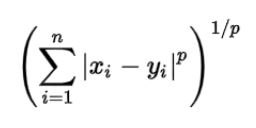
As per the equation, we have to select the p-value also.
* p = 1 , Manhattan Distance
* p = 2 , Euclidean Distance
* p = infinity , Cheybchev Distance

In [7]:
# Predicting the dependent variable, i.e. y_pred
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.95
